In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, load_img

Dataset Split function , Already have splitted data to train, test, validate sets.

In [ ]:
# # Function to split data into training, validation, and test sets
# def split_data(source_dir, train_dir, val_dir, test_dir, split_size=0.15):
#     for class_folder in os.listdir(source_dir):
#         class_source_dir = os.path.join(source_dir, class_folder)
#         if not os.path.isdir(class_source_dir):
#             continue

#         print(f'Processing class folder: {class_folder}')
#         train_class_dir = os.path.join(train_dir, class_folder)
#         val_class_dir = os.path.join(val_dir, class_folder)
#         test_class_dir = os.path.join(test_dir, class_folder)

#         os.makedirs(train_class_dir, exist_ok=True)
#         os.makedirs(val_class_dir, exist_ok=True)
#         os.makedirs(test_class_dir, exist_ok=True)

#         file_list = [f for f in os.listdir(class_source_dir) if os.path.isfile(os.path.join(class_source_dir, f))]
#         print(f'Found {len(file_list)} files in {class_folder}')
#         if len(file_list) == 0:
#             print(f'No files found in {class_folder}, skipping.')
#             continue

#         train_files, test_files = train_test_split(file_list, test_size=split_size, random_state=42)
#         val_files, test_files = train_test_split(test_files, test_size=0.5, random_state=42)

#         for file in train_files:
#             shutil.copy(os.path.join(class_source_dir, file), os.path.join(train_class_dir, file))
#         for file in val_files:
#             shutil.copy(os.path.join(class_source_dir, file), os.path.join(val_class_dir, file))
#         for file in test_files:
#             shutil.copy(os.path.join(class_source_dir, file), os.path.join(test_class_dir, file))

# # Define dataset paths
# base_dir = '/content/drive/My Drive/Crop disease detection Dataset/'
# train_dir = os.path.join(base_dir, 'train')
# val_dir = os.path.join(base_dir, 'val')
# test_dir = os.path.join(base_dir, 'test')

# # Splitting the dataset
# split_data(base_dir, train_dir, val_dir, test_dir)

In [ ]:
base_dir = '/content/drive/My Drive/Crop disease detection Dataset/'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
# Image Data Generators with Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Batch size
batch_size = 32

# Generate batches of data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Number of classes
num_classes = len(os.listdir(train_dir))
print(f"Number of classes: {num_classes}")

Found 3700 images belonging to 4 classes.
Found 326 images belonging to 4 classes.
Found 328 images belonging to 4 classes.
Number of classes: 4


In [ ]:
# # Feature Extraction Model using VGG16
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(num_classes, activation='softmax')
# ])

# base_model.trainable = False

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 14979396 (57.14 MB)
Trainable params: 26470

In [ ]:
# epochs = 20

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=val_generator,
#     validation_steps=val_generator.samples // batch_size
# )

Epoch 1/20
115/115 [==============================] - 787s 7s/step - loss: 0.6765 - accuracy: 0.7189 - val_loss: 0.3192 - val_accuracy: 0.8844
Epoch 2/20
115/115 [==============================] - 46s 402ms/step - loss: 0.4191 - accuracy: 0.8375 - val_loss: 0.2711 - val_accuracy: 0.8969
Epoch 3/20
115/115 [==============================] - 46s 399ms/step - loss: 0.3674 - accuracy: 0.8501 - val_loss: 0.2736 - val_accuracy: 0.8969
Epoch 4/20
115/115 [==============================] - 46s 401ms/step - loss: 0.3284 - accuracy: 0.8667 - val_loss: 0.2226 - val_accuracy: 0.9000
Epoch 5/20
115/115 [==============================] - 46s 403ms/step - loss: 0.3264 - accuracy: 0.8735 - val_loss: 0.2236 - val_accuracy: 0.9000
Epoch 6/20
115/115 [==============================] - 46s 401ms/step - loss: 0.3107 - accuracy: 0.8735 - val_loss: 0.2427 - val_accuracy: 0.8938
Epoch 7/20
115/115 [==============================] - 46s 399ms/step - loss: 0.3076 - accuracy: 0.8694 - val_loss: 0.2216 - val_accu

In [ ]:
# # Save the model in the native Keras format
# model.save('/content/drive/My Drive/Crop_disease_model.keras')
# print("Model saved successfully")


Model saved successfully


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/drive/My Drive/Trained Model/Corn_model.keras')
print("Model loaded successfully")


Model loaded successfully


10/10 [==============================] - 68s 7s/step - loss: 0.1838 - accuracy: 0.9187
Test accuracy: 0.918749988079071


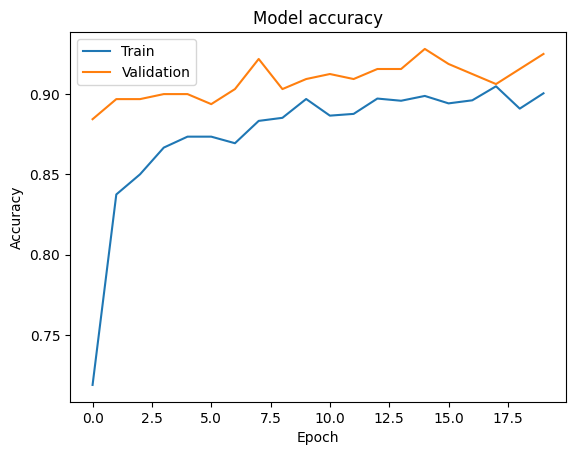

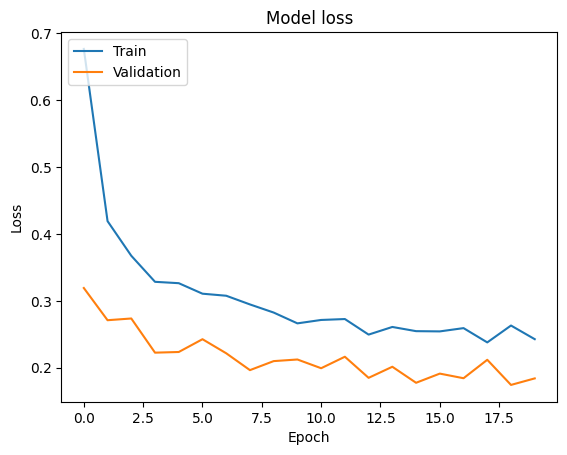

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Class Labels: ['Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___Northern_Leaf_Blight', 'Corn___healthy']


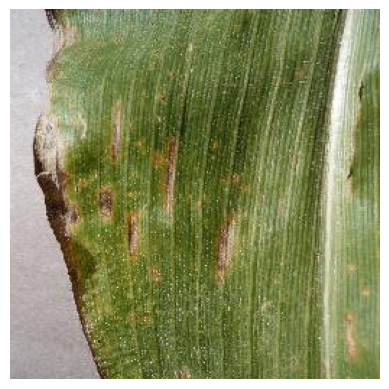

1/1 [==============================] - 0s 195ms/step
Predicted Class: Corn___Cercospora_leaf_spot Gray_leaf_spot
Predicted Class Probability: 92.75 %
Actual Class: Corn   Cercospora leaf spot Gray leaf spot 

Prediction Array: [[9.2747736e-01 4.7596190e-03 6.7710839e-02 5.2077194e-05]]
Predicted Class Index: 0
Image Path: /content/drive/My Drive/Crop disease detection Dataset/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (51).JPG


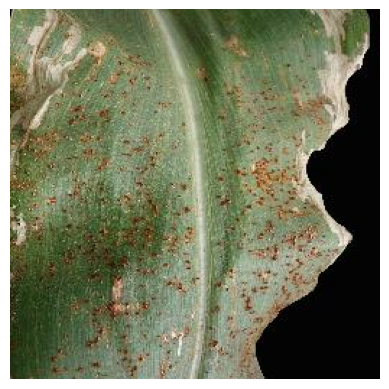

1/1 [==============================] - 0s 51ms/step
Predicted Class: Corn___Common_rust
Predicted Class Probability: 99.89 %
Actual Class: Corn   Common rust 

Prediction Array: [[1.1111253e-04 9.9893445e-01 9.5440005e-04 2.7641917e-08]]
Predicted Class Index: 1
Image Path: /content/drive/My Drive/Crop disease detection Dataset/test/Corn___Common_rust/image (30).JPG


In [ ]:
import matplotlib.image as mpimg
def predict_image(model, img_path, class_labels):
    # Extract actual class from image path
    actual_class = os.path.basename(os.path.dirname(img_path)).replace('_', ' ')

    # Load and display the image
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess the image for prediction
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)

    # Display prediction result
    predicted_class_label = class_labels[predicted_class_index]
    predicted_class_probability = np.max(prediction)

    print('Predicted Class:', predicted_class_label)
    print('Confidence', round(predicted_class_probability * 100, 2), '%')
    print('Actual Class:', actual_class, '\n')
    print('Prediction Array:', prediction)
    print('Predicted Class Index:', predicted_class_index)
    print('Image Path:', img_path)

# Automatically define class labels from directories
def get_class_labels(base_dir):
    return sorted(os.listdir(base_dir))

# Define dataset paths
base_dir = '/content/drive/My Drive/Crop disease detection Dataset/test'

# Get class labels
class_labels = get_class_labels(base_dir)
print(f"Class Labels: {class_labels}")

# # Example usage
image_paths = [
    '/content/drive/My Drive/Crop disease detection Dataset/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (51).JPG',
    '/content/drive/My Drive/Crop disease detection Dataset/test/Corn___Common_rust/image (30).JPG',
]

for image_path in image_paths:
    predict_image(model, image_path, class_labels)

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)

# Print the test accuracy
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


11/11 - 3s - loss: 0.1799 - accuracy: 0.9207 - 3s/epoch - 277ms/step
Test accuracy: 92.07%


11/11 [==============================] - 3s 263ms/step


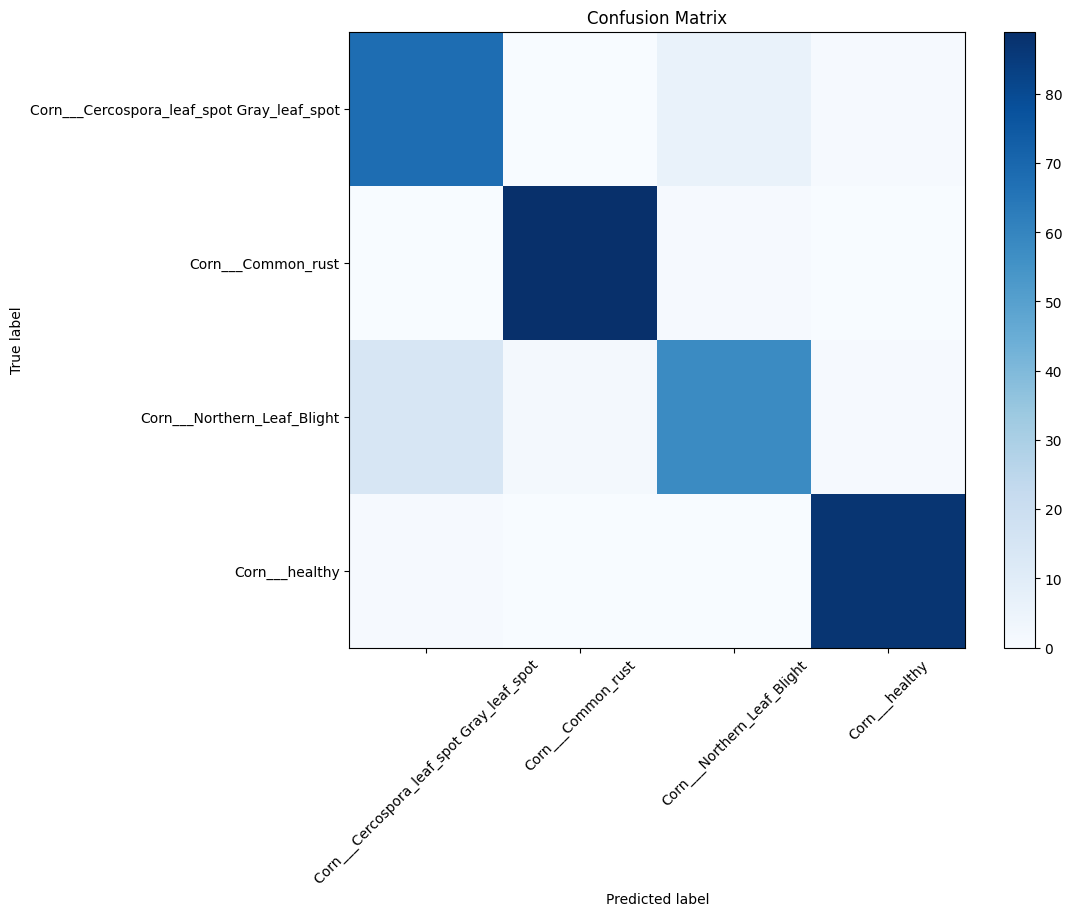

                                            precision    recall  f1-score   support

Corn___Cercospora_leaf_spot Gray_leaf_spot       0.82      0.91      0.86        75
                        Corn___Common_rust       0.98      0.99      0.98        90
               Corn___Northern_Leaf_Blight       0.89      0.77      0.83        75
                            Corn___healthy       0.98      0.99      0.98        88

                                  accuracy                           0.92       328
                                 macro avg       0.92      0.91      0.91       328
                              weighted avg       0.92      0.92      0.92       328



In [ ]:
# Predict on test data
Y_pred = model.predict(test_generator, test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add class labels
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Plot confusion matrix
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=class_labels))